### <u>Machine Learning and NLP</u>

# Module 3 - Supervised Learning - Classification 

### Demo 1 - Receiver Operating Characteristics

In this demo, you will use chebyshev inquality based classifer and evaluate it using ROC curve.

---

## Problem Statement

Creating a Python function to generate n number of points
in a ring on 2D plane centred at (c_x, c_y) of respective inner and
outer radius r_inner and r_outer. Using this function generate points within the ring and display the scatter plot of the
positive class points and negative class points in red and blue colour
respectively. Using the **Chebyshev inequality based classifier** on the positive class
points and plot the **ROC curve**.

---

## Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Python function to Generate Points Within a RING

In [2]:
def genRandPointsInRing(r_inner_pos, r_outer_pos, r_inner_neg, r_outer_neg, centre, n):
     
    r_in_arr = np.random.uniform(r_inner_pos, r_outer_pos,n)
    r_out_arr = np.random.uniform(r_inner_neg,r_outer_neg,n)
    theta_arr = np.random.uniform(0,2*np.pi,n)
   
    cos_theta = np.cos(theta_arr)
    sin_theta = np.sin(theta_arr)
    c1 = centre[0]
    c2 = centre[1]
    
    x_inn = c1 + np.multiply(r_in_arr,cos_theta)
    y_inn = c2 + np.multiply(r_in_arr,sin_theta)
   
    x_out = c1 + np.multiply(r_out_arr,cos_theta)
    y_out = c2 + np.multiply(r_out_arr,sin_theta)

    return (x_inn, x_out, y_inn, y_out)

## Plot to show the distribution of both classes

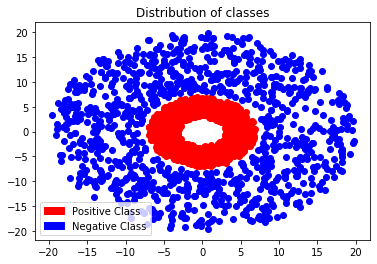

In [21]:
x_inn,x_out,y_inn,y_out = genRandPointsInRing(3,7,8,20,[0,0],1000)
fig = plt.figure()
plt.scatter(x_inn,y_inn,c = "red")
plt.scatter(x_out,y_out,c = "blue")
red_patch = mpatches.Patch(color='red', label='Positive Class')
blue_patch = mpatches.Patch(color='blue', label='Negative Class')
plt.legend(handles=[red_patch,blue_patch])
plt.title("Distribution of classes")
plt.show()

## Generating a Data Set out of the points and printing its shape

In [22]:
x_total = np.append(x_inn,x_out)
y_total = np.append(y_inn,y_out)

features = np.hstack((np.matrix(x_total).T,np.matrix(y_total).T))
label = np.array([])

for i in range(len(x_inn)+len(x_out)):
    if(i<len(x_inn)):
        label = np.append(label,1)               ## Positive class
    else:
        label = np.append(label,0)               ## Negative class
        
data_set = np.hstack((features,np.matrix(label).T))
np.random.shuffle(data_set)
print(data_set.shape)

(2000, 3)


## Function to classify Data based on Chebyshev's Inequality

In [23]:
def classifier_perf(data_set,K):
   
    row,col = data_set.shape
    ls1 = []
    for i in range(row):
        if data_set[i,-1] == 1:
            ls1.append(np.squeeze(np.asarray(data_set[i,:col-1])))
            
    pos_data = np.matrix(ls1)
   
    mean = np.squeeze(np.asarray(np.mean(pos_data,axis=0)))
    std = np.squeeze(np.asarray(np.std(pos_data,axis=0)))
      
    u_x = mean[0]
    u_y = mean[1]
   
    sig_x = std[0]
    sig_y = std[1]
   
    TP = 0
    FP = 0
    TN = 0
    FN = 0
   
    for i in range(row):
        z = np.square((data_set[i,0]-u_x)/sig_x) + np.square((data_set[i,1]-u_y)/sig_y)  # chebychev's rule
        z = np.sqrt(z)
        if(z<=K):
            pred_op = 1
        else:
            pred_op = 0
            
        if(pred_op == 1 and data_set[i,2] == 1):
            TP +=1
        elif(pred_op == 0 and data_set[i,2] == 0):
            TN +=1    
        elif (pred_op == 1 and data_set[i,2] == 0):
            FP +=1
        else:
            FN +=1
   
    FPR = FP/(FP+TN)
    TPR = TP/(TP+FN)
   
    return (FPR, TPR)

## Checking the classifer's performance by varying 'K' over a range

In [24]:
K_range = np.arange(0.5,10,0.5)
FPR_ls = []
TPR_ls = []            
for i in K_range:  
    FPR,TPR = classifier_perf(data_set,i)
    FPR_ls.append(FPR)
    TPR_ls.append(TPR)

## Plot to show the ROC of the Classifier

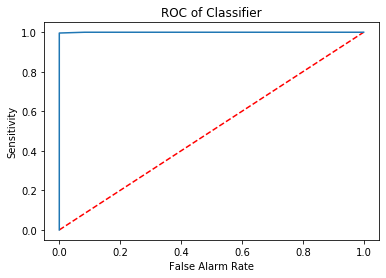

In [25]:
fig = plt.figure()
plt.ylabel("Sensitivity")
plt.xlabel("False Alarm Rate")
plt.plot([0, 1], [0, 1],'r--')
plt.title("ROC of Classifier")
plt.plot(FPR_ls,TPR_ls)
plt.show()

*__Conclusion__*: In this demonstration, we have gained an understanding about Chebyshev inequality based classifier and ROC curve.